# read data from excel sheet and process the data and visualize


In [1]:
library(xlsx)           # for reading in Excel data
library(dplyr)          # for data manipulation
library(tidyr)          # for data manipulation
library(magrittr)       # for easier syntax in one or two areas
library(gridExtra)      # for generating the bin width comparison plot
library(ggplot2)        # for generating the visualization

Loading required package: rJava
Loading required package: xlsxjars

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'magrittr'

The following object is masked from 'package:tidyr':

    extract


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



In [2]:
# read in PEW data
income <- read.xlsx("C:/Users/mrahman8/Downloads/Middle-Class-U.S.-Metro-Areas-5-12-16-Supplementary-Tables.xlsx",
                    sheetIndex = "3. Median HH income, metro",
                    startRow = 8, colIndex = c(1:5, 7:10)) %>%
          set_colnames(c("Metro", "All_99", "Lower_99", "Middle_99", "Upper_99",
                         "All_14", "Lower_14", "Middle_14", "Upper_14")) %>%
          filter(Metro != "NA")

head(income)

Metro,All_99,Lower_99,Middle_99,Upper_99,All_14,Lower_14,Middle_14,Upper_14
"Akron, OH",77688.32,27587.97,81671.30,180745.0,68190.98,25969.68,75771.61,173668.5
"Albany-Schenectady-Troy, NY",73185.16,27322.46,79718.21,177674.0,76767.68,24641.59,77120.00,163299.3
"Albuquerque, NM",66067.18,26426.87,76363.59,186766.8,58864.75,21442.49,71643.16,178378.0
"Allentown-Bethlehem-Easton, PA-NJ",71607.73,29007.45,78782.43,180202.6,69499.99,25739.85,76530.15,169741.0
"Amarillo, TX",60599.32,27014.16,76296.73,183931.1,63254.27,25958.56,71626.16,162210.0
"Anchorage, AK",76652.96,27813.29,81361.67,173445.9,77459.67,24474.62,79652.79,173913.0


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


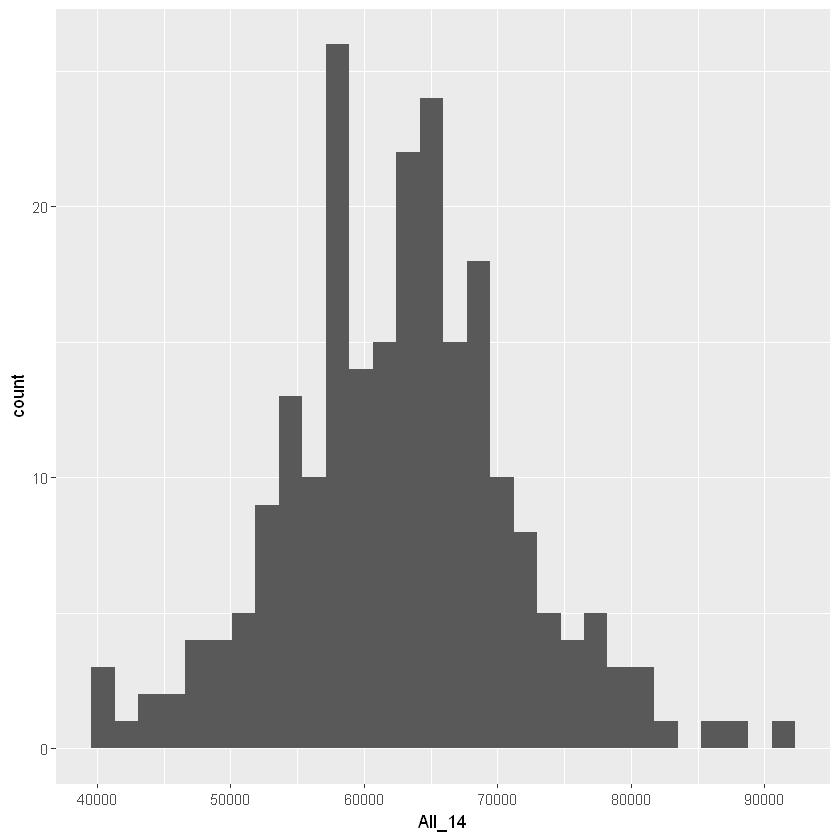

In [3]:
# basic histogram
ggplot(income, aes(x = All_14)) +
        geom_histogram()

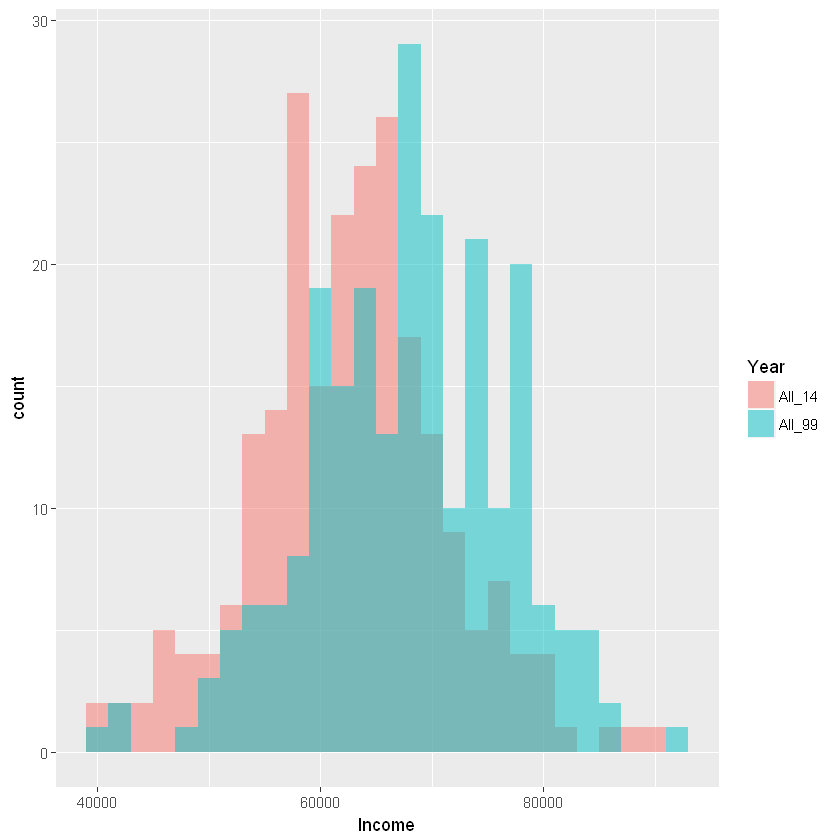

In [4]:
# turn data to long form
compare <- income %>%
        select(Metro, All_99, All_14) %>%
        gather(Year, Income, All_99:All_14)

# Overlaying histograms
ggplot(compare, aes(x = Income, fill = Year)) +
        geom_histogram(binwidth = 2000, alpha = .5, position = "identity")

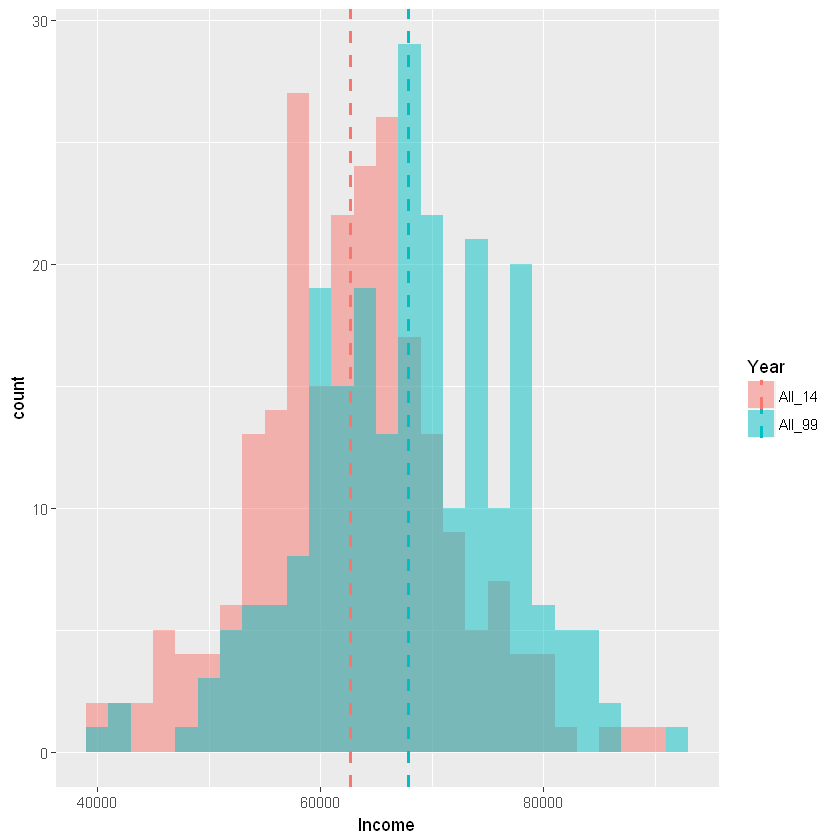

In [5]:
# Add median line to overlaid histograms
compare_mean <- compare %>%
        group_by(Year) %>%
        summarise(Mean = mean(Income))

ggplot(compare, aes(x = Income, fill = Year)) +
        geom_histogram(binwidth = 2000, alpha = .5, position = "identity") +
        geom_vline(data = compare_mean, aes(xintercept = Mean, color = Year),
                   linetype = "dashed", size = 1)

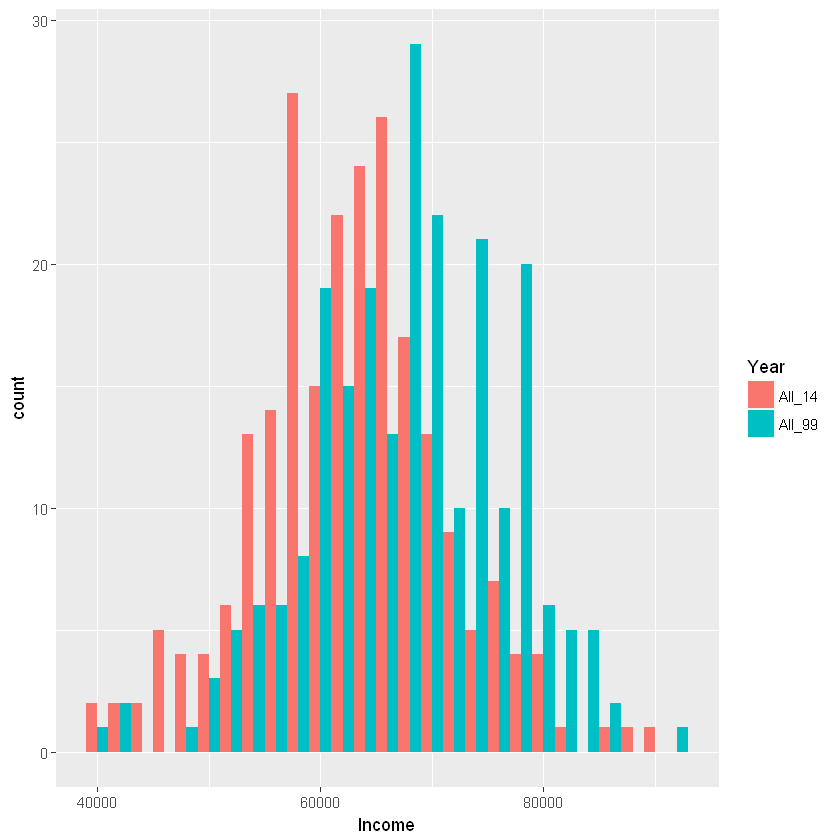

In [6]:
# Interweaving histograms
ggplot(compare, aes(x = Income, fill = Year)) +
        geom_histogram(binwidth = 2000, position = "dodge")

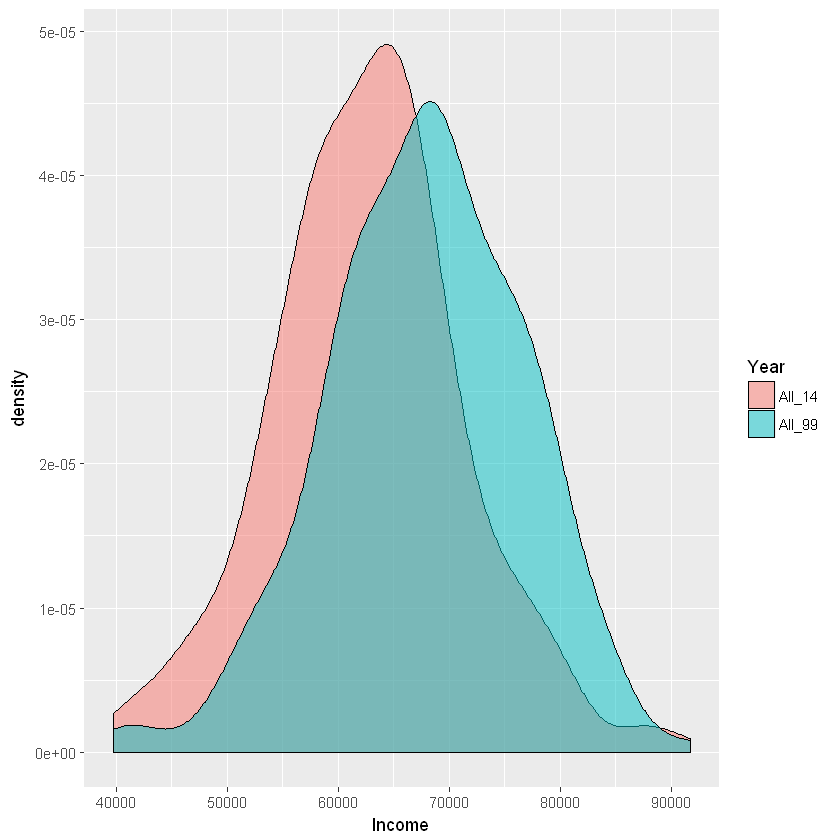

In [7]:
# Overlaying density plots
ggplot(compare, aes(x = Income, fill = Year)) +
        geom_density(alpha = .5)

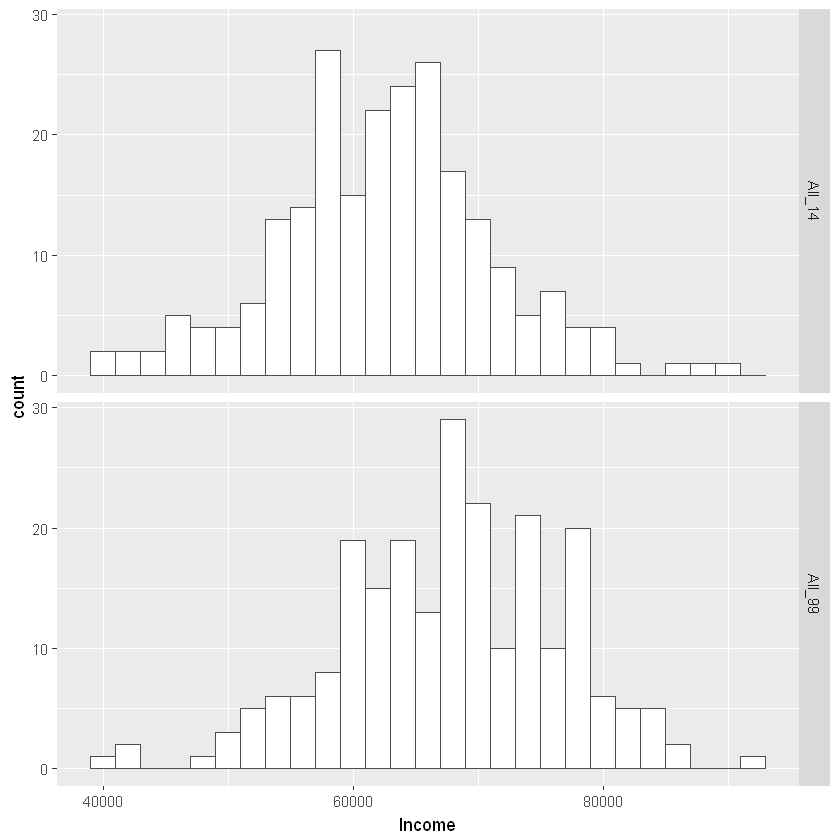

In [8]:
# use of facet
ggplot(compare, aes(x = Income)) +
        geom_histogram(binwidth = 2000, color = "grey30", fill = "white") +
        facet_grid(Year ~ .)

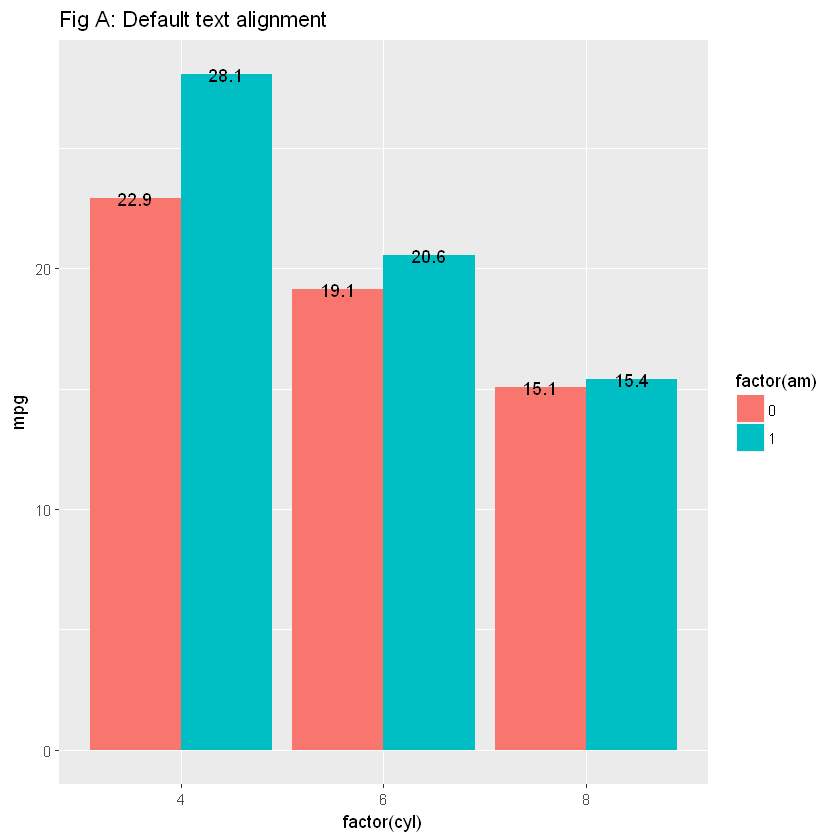

In [10]:
library(dplyr)
avg_mpg <- mtcars %>%
        group_by(cyl, am) %>%
        summarise(mpg = mean(mpg, na.rm = TRUE))
ggplot(avg_mpg, aes(factor(cyl), mpg, fill = factor(am))) +
        geom_bar(stat = "identity", position = "dodge") +
        geom_text(aes(label = round(mpg, 1)), position = position_dodge(0.9)) +
        ggtitle("Fig A: Default text alignment")


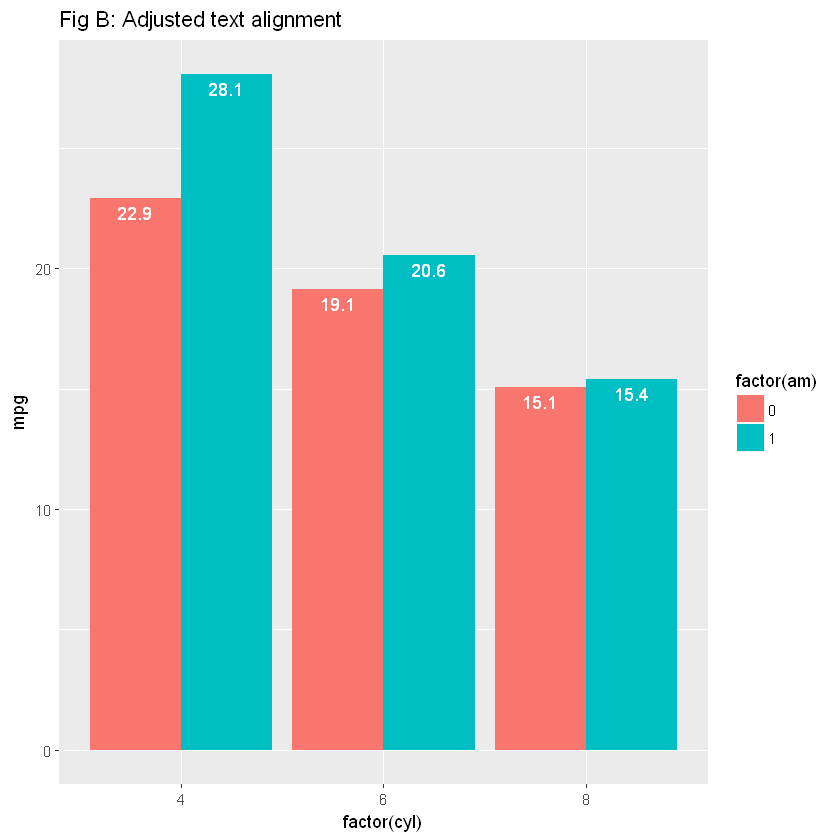

In [12]:
#adjust texy alignment
p2 <- ggplot(avg_mpg, aes(factor(cyl), mpg, fill = factor(am))) +
        geom_bar(stat = "identity", position = "dodge") +
        geom_text(aes(label = round(mpg, 1)), position = position_dodge(0.9),
                  vjust = 1.5, color = "white") +
        ggtitle("Fig B: Adjusted text alignment")
p2

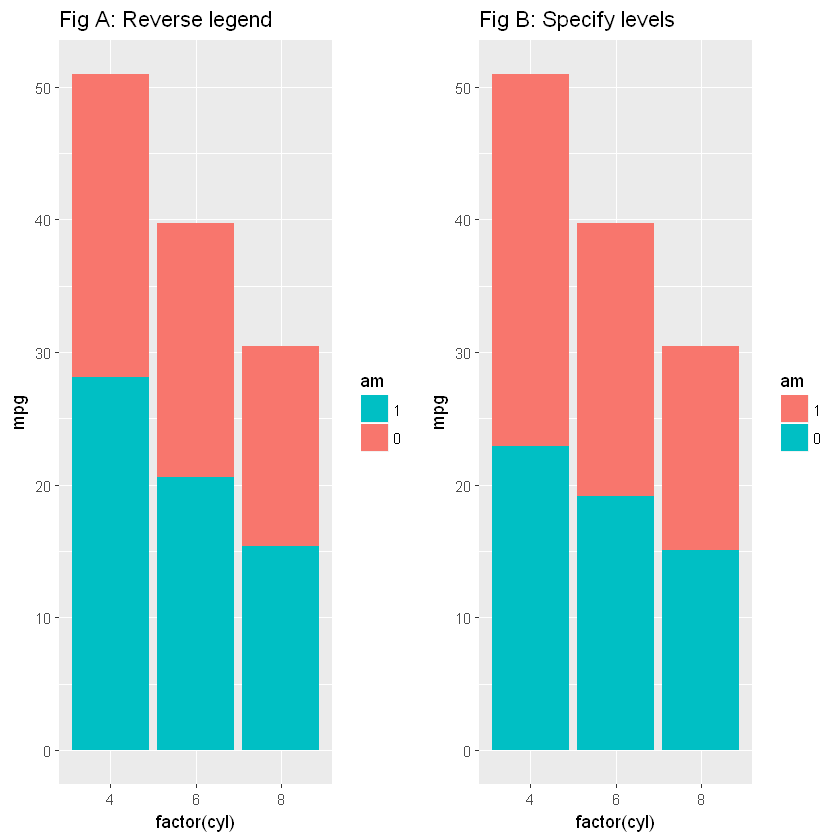

In [13]:
# Reverse legend color coding layout
p1 <- ggplot(avg_mpg, aes(factor(cyl), mpg, fill = factor(am))) +
        geom_bar(stat = "identity") +
        guides(fill = guide_legend(reverse = TRUE)) +
        labs(fill = "am") +
        ggtitle("Fig A: Reverse legend")

# or reverse stacking order by changing the factor levels
p2 <- ggplot(avg_mpg, aes(factor(cyl), mpg, fill = factor(am, levels = c(1, 0)))) +
        geom_bar(stat = "identity") +
        labs(fill = "am") +
        ggtitle("Fig B: Specify levels")

grid.arrange(p1, p2, ncol = 2)

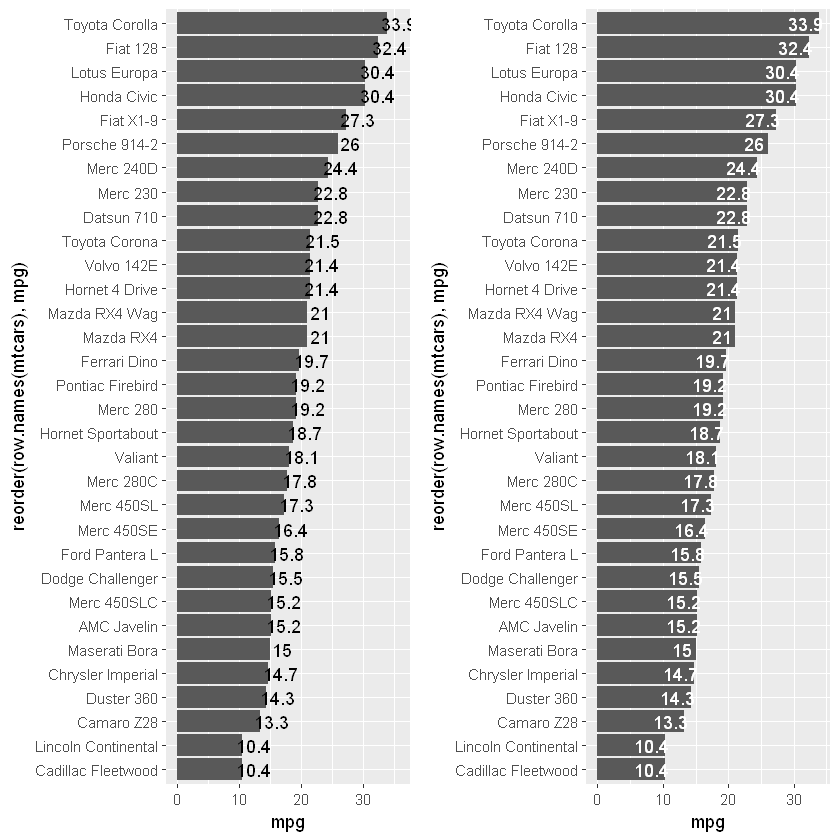

In [14]:
p1 <- ggplot(mtcars, aes(reorder(row.names(mtcars), mpg), mpg)) +
        geom_bar(stat = "identity") +
        coord_flip() +
        geom_text(aes(label = mpg), nudge_y = 2)

p2 <- ggplot(mtcars, aes(reorder(row.names(mtcars), mpg), mpg)) +
        geom_bar(stat = "identity") +
        coord_flip() +
        geom_text(aes(label = mpg), nudge_y = -2, color = "white")

grid.arrange(p1, p2, ncol = 2)

In [15]:
library(datasets)
library(ggplot2)

data(airquality)
airquality$Month <- factor(airquality$Month,
                           labels = c("May", "Jun", "Jul", "Aug", "Sep"))

Warning message:
"Removed 37 rows containing non-finite values (stat_boxplot)."

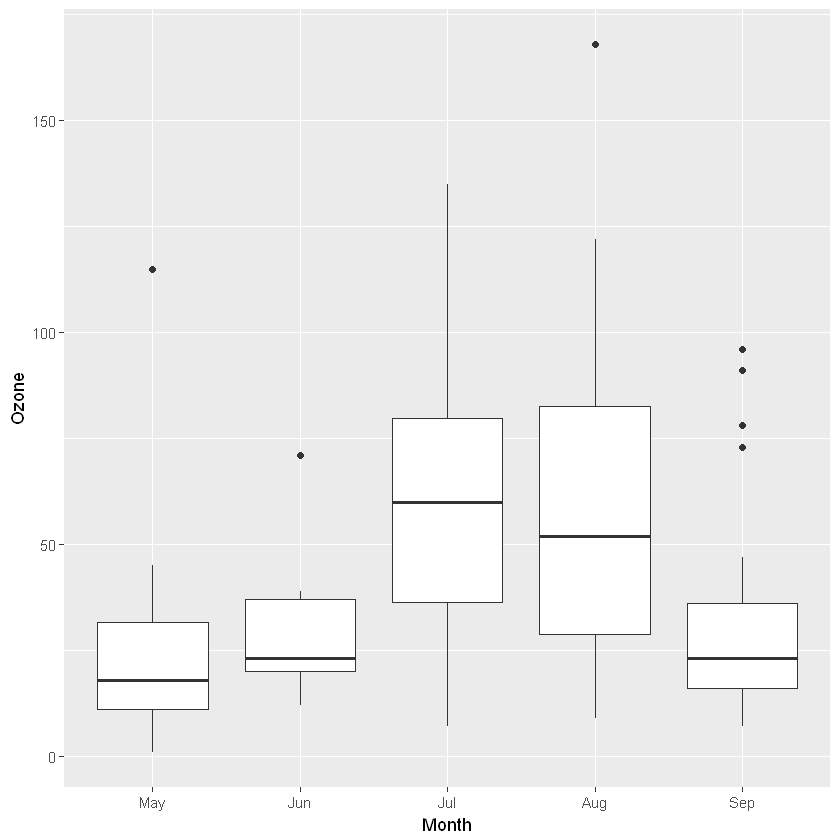

In [16]:
ggplot(airquality, aes(x = Month, y = Ozone)) +
        geom_boxplot()

Warning message:
"Removed 37 rows containing non-finite values (stat_boxplot)."Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning mes

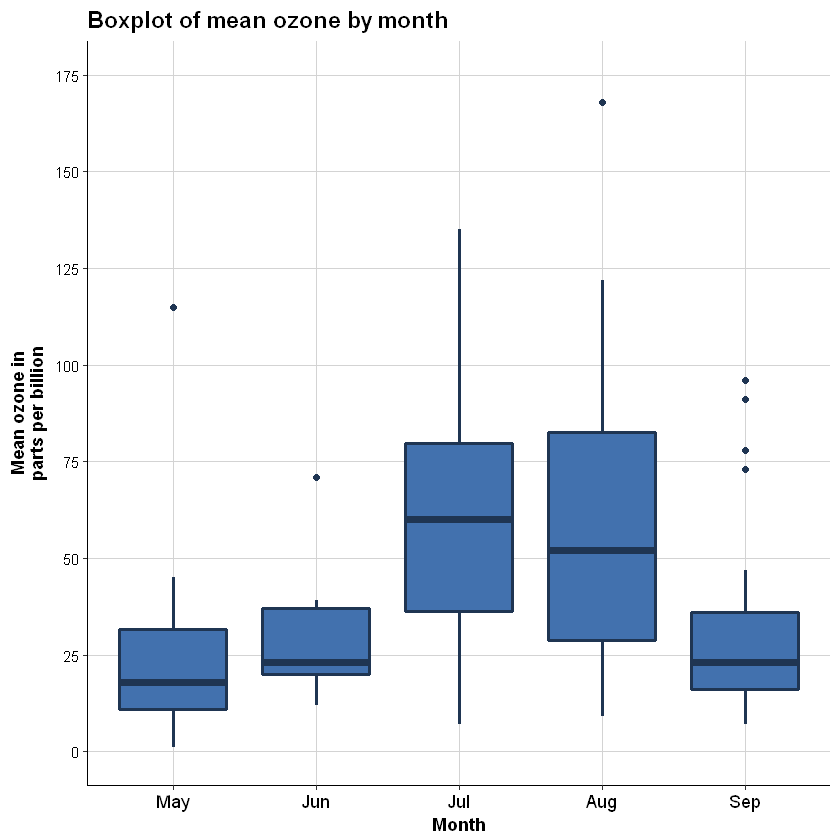

In [18]:
library(grid)

fill <- "#4271AE"
lines <- "#1F3552"

p10 <- ggplot(airquality, aes(x = Month, y = Ozone)) +
        geom_boxplot(colour = lines, fill = fill,
                     size = 1) +
        scale_y_continuous(name = "Mean ozone in\nparts per billion",
                              breaks = seq(0, 175, 25),
                              limits=c(0, 175)) +
        scale_x_discrete(name = "Month") +
        ggtitle("Boxplot of mean ozone by month") +
        theme_bw() +
        theme(panel.grid.major = element_line(colour = "#d3d3d3"),
              panel.grid.minor = element_blank(),
              panel.border = element_blank(),
              panel.background = element_blank(),
              plot.title = element_text(size = 14, family = "Tahoma", face = "bold"),
              text=element_text(family = "Tahoma"),
              axis.title = element_text(face="bold"),
              axis.text.x = element_text(colour="black", size = 11),
              axis.text.y = element_text(colour="black", size = 9),
              axis.line = element_line(size=0.5, colour = "black"))
p10

In [25]:
fill <- "#4271AE"
lines <- "#1F3552"
airquality_trimmed <- airquality[which(airquality$Month == "Jul" |
                                       airquality$Month == "Aug" |
                                       airquality$Month == "Sep"), ]
airquality_trimmed$Temp.f <- factor(ifelse(airquality_trimmed$Temp > mean(airquality_trimmed$Temp), 1, 0),
                                    labels = c("Low temp", "High temp"))

p10 <- ggplot(airquality_trimmed, aes(x = Month, y = Ozone)) +
        geom_boxplot(fill = fill, colour = lines,
                     alpha = 0.7) +
        scale_y_continuous(name = "Mean ozone in\nparts per billion",
                           breaks = seq(0, 175, 50),
                           limits=c(0, 175)) +
        scale_x_discrete(name = "Month") +
        ggtitle("Boxplot of mean ozone by month") +
        theme_bw() +
        theme(plot.title = element_text(size = 14, family = "Tahoma", face = "bold"),
              text = element_text(size = 12, family = "Tahoma"),
              axis.title = element_text(face="bold"),
              axis.text.x=element_text(size = 11)) +
        facet_grid(. ~ Temp.f)

Warning message:
"Removed 11 rows containing non-finite values (stat_boxplot)."Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning mes

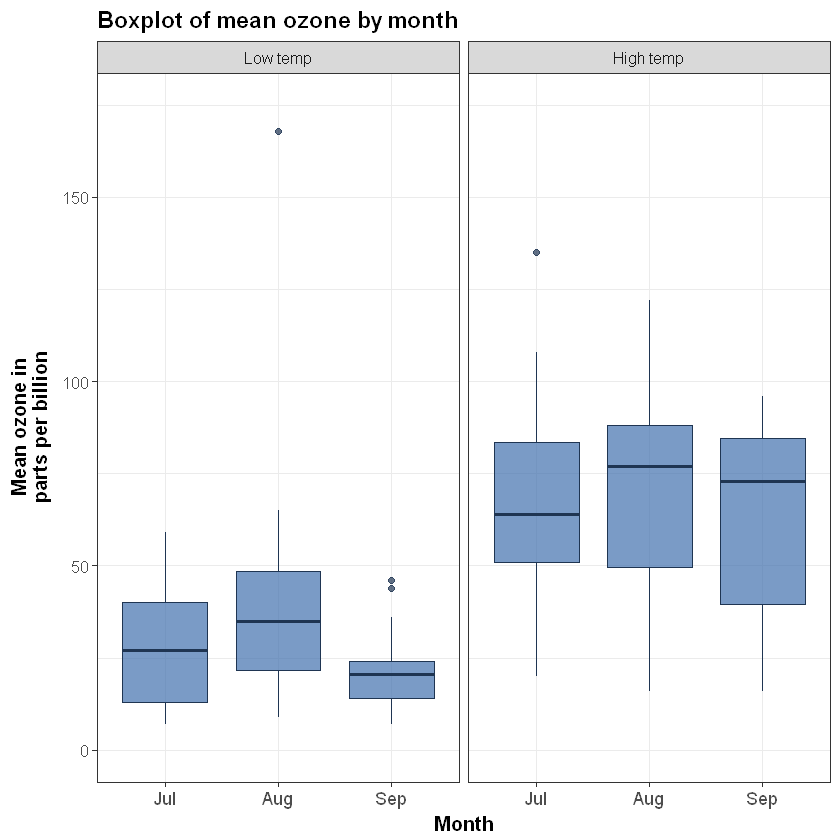

In [26]:
p10

Warning message:
"Removed 11 rows containing non-finite values (stat_boxplot)."Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning mes

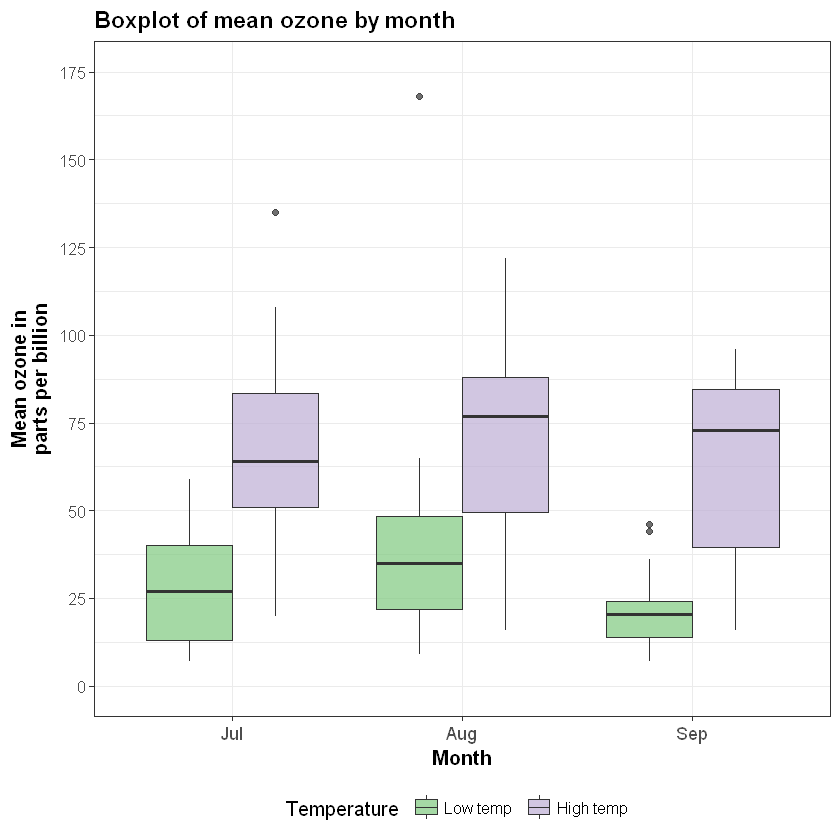

In [28]:
p10 <- ggplot(airquality_trimmed, aes(x = Month, y = Ozone, fill = Temp.f)) +
        geom_boxplot(alpha=0.7) +
        scale_y_continuous(name = "Mean ozone in\nparts per billion",
                           breaks = seq(0, 175, 25),
                           limits=c(0, 175)) +
        scale_x_discrete(name = "Month") +
        ggtitle("Boxplot of mean ozone by month") +
        theme_bw() +
        theme(plot.title = element_text(size = 14, family = "Tahoma", face = "bold"),
              text = element_text(size = 12, family = "Tahoma"),
              axis.title = element_text(face="bold"),
              axis.text.x=element_text(size = 11),
              legend.position = "bottom") +
        scale_fill_brewer(palette = "Accent") +
        labs(fill = "Temperature")
p10

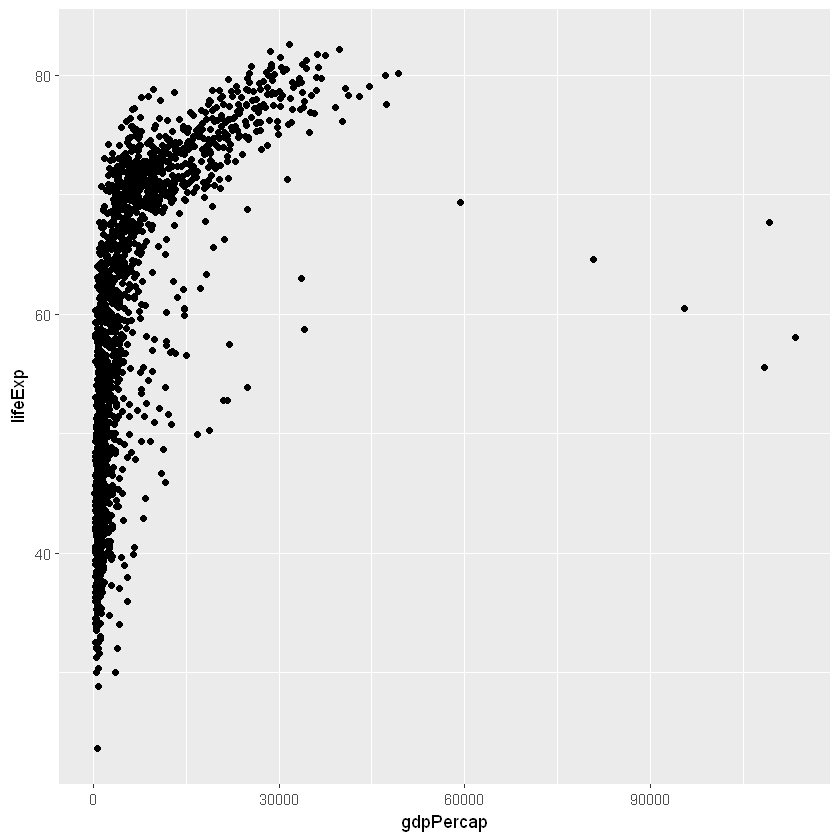

In [29]:
#read data from a weblink
gapminder <- read.csv("http://kbroman.org/datacarp/gapminder.csv")
ggplot(gapminder, aes(x=gdpPercap, y=lifeExp)) + geom_point()


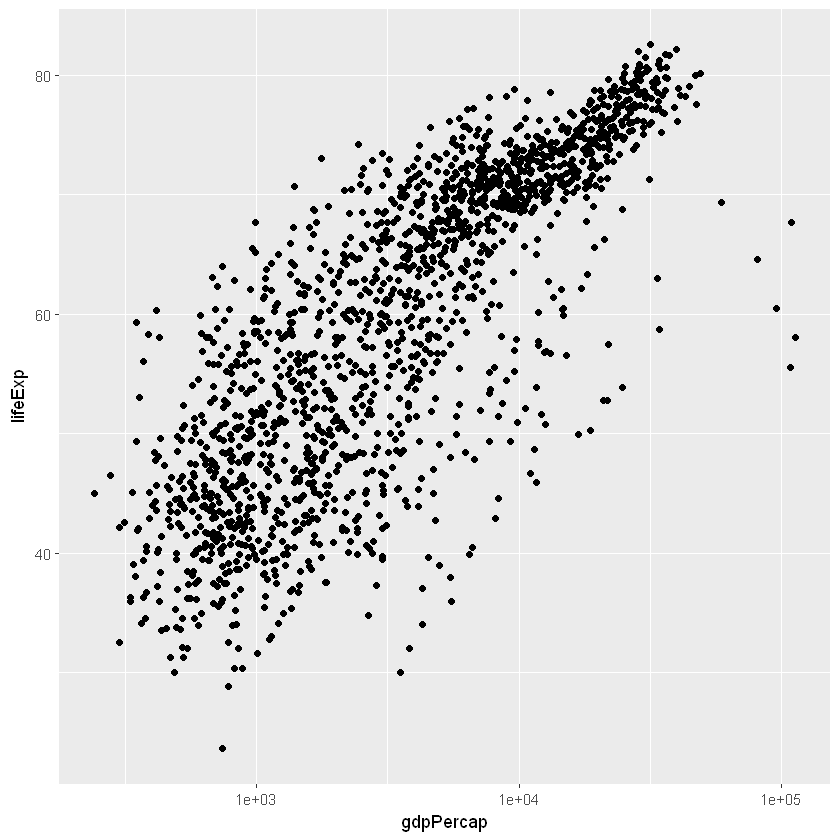

In [30]:
# plot x axis in log scale
ggplot(gapminder, aes(x=gdpPercap, y=lifeExp)) + geom_point() + scale_x_log10()

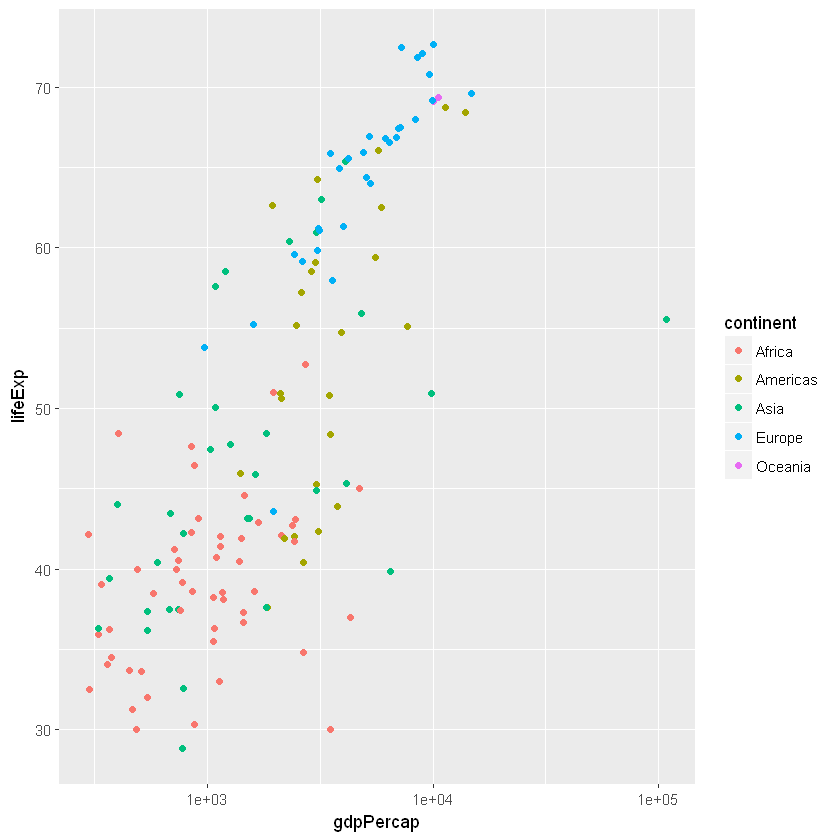

In [31]:
gm_1952 <- filter(gapminder, year==1952)
ggplot(gm_1952, aes(x=gdpPercap, y=lifeExp)) +
    geom_point() + scale_x_log10() +
    aes(color=continent)

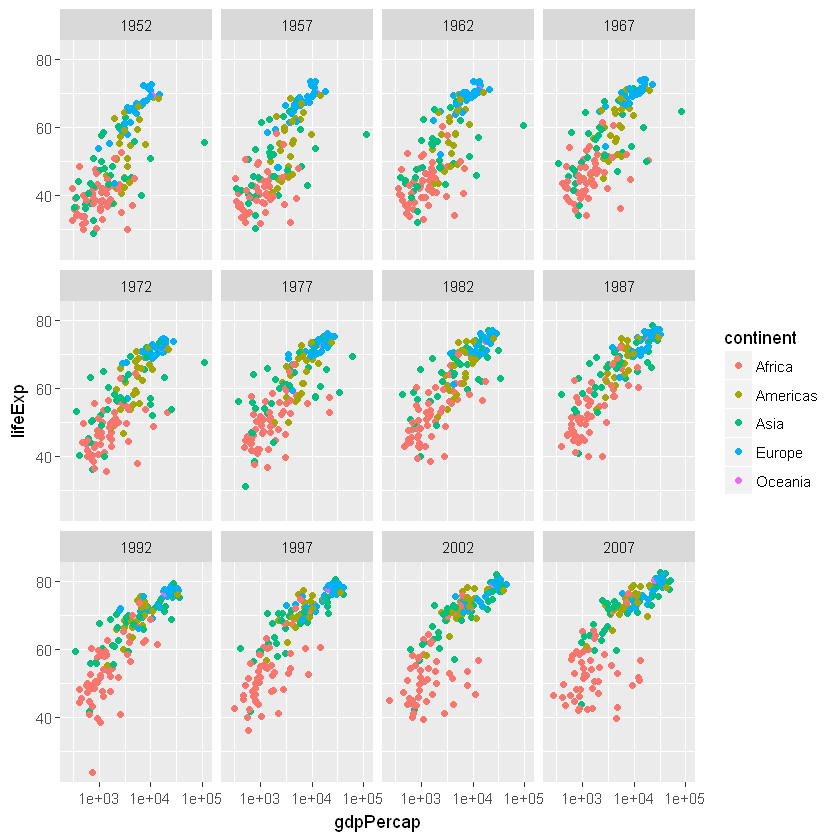

In [32]:
p <- ggplot(gapminder, aes(x=gdpPercap, y=lifeExp)) + geom_point() + scale_x_log10()
p + aes(color=continent) + facet_wrap(~ year)

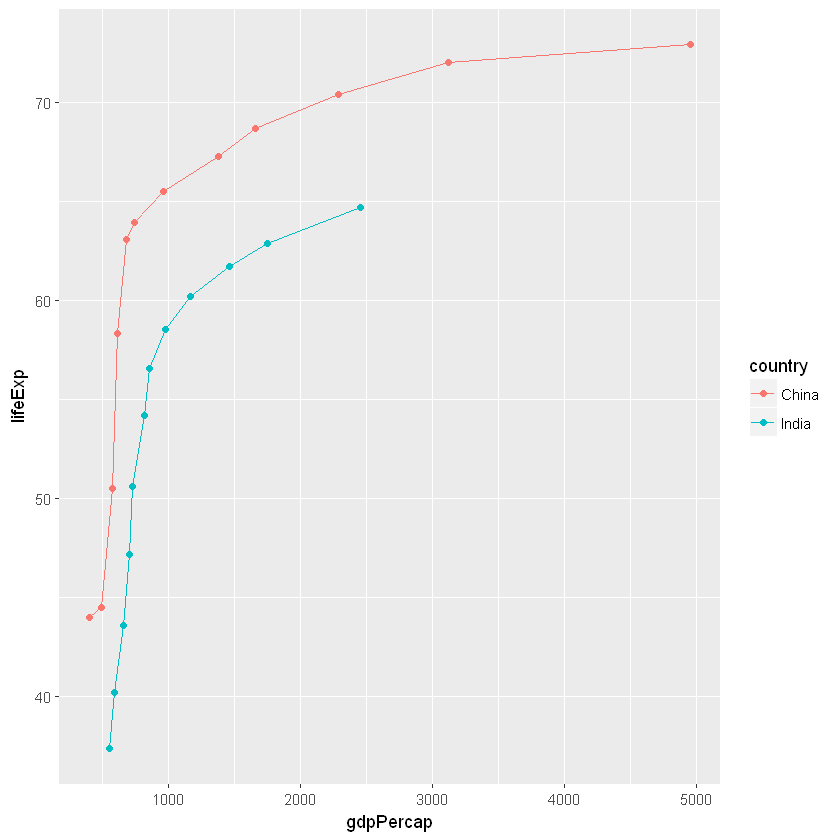

In [36]:
#Make a plot of lifeExp vs gdpPercap for China and India, with both lines and points.
india_china <- filter(gapminder, country=="India" | country=="China")
p <- ggplot(india_china, aes(y=lifeExp, x=gdpPercap))
p + aes(color=country) + geom_line() + geom_point()

`geom_smooth()` using method = 'gam'


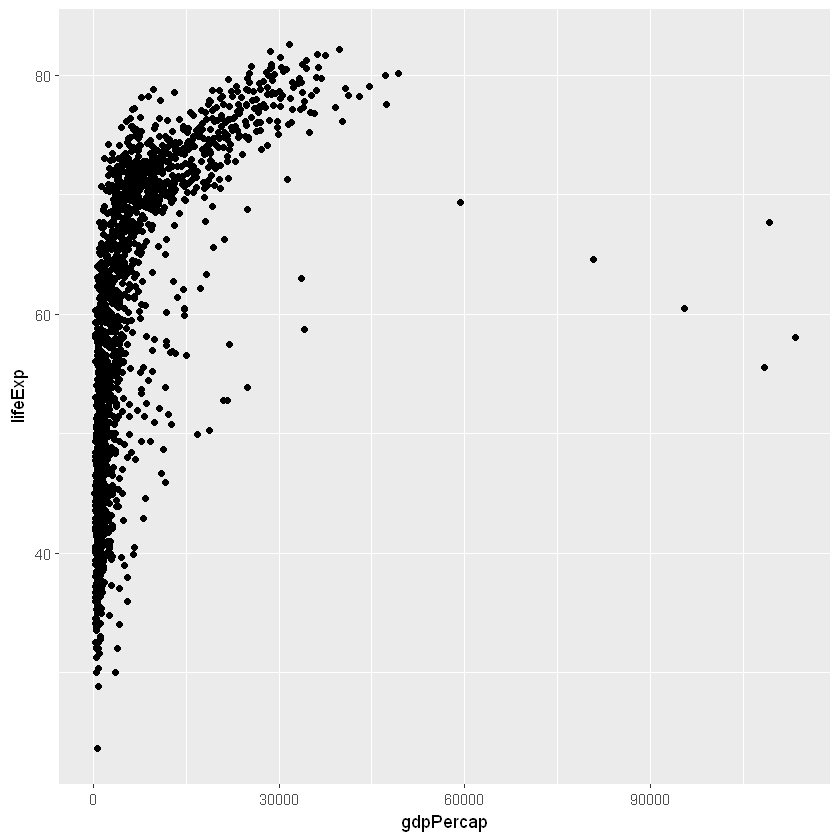

`geom_smooth()` using method = 'loess'


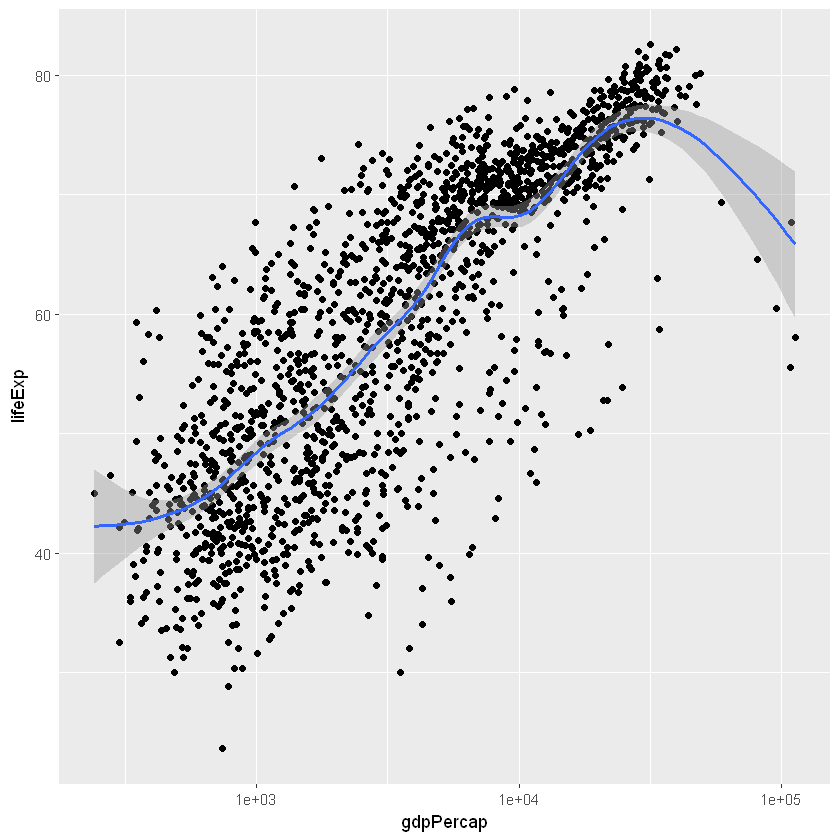

`geom_smooth()` using method = 'loess'


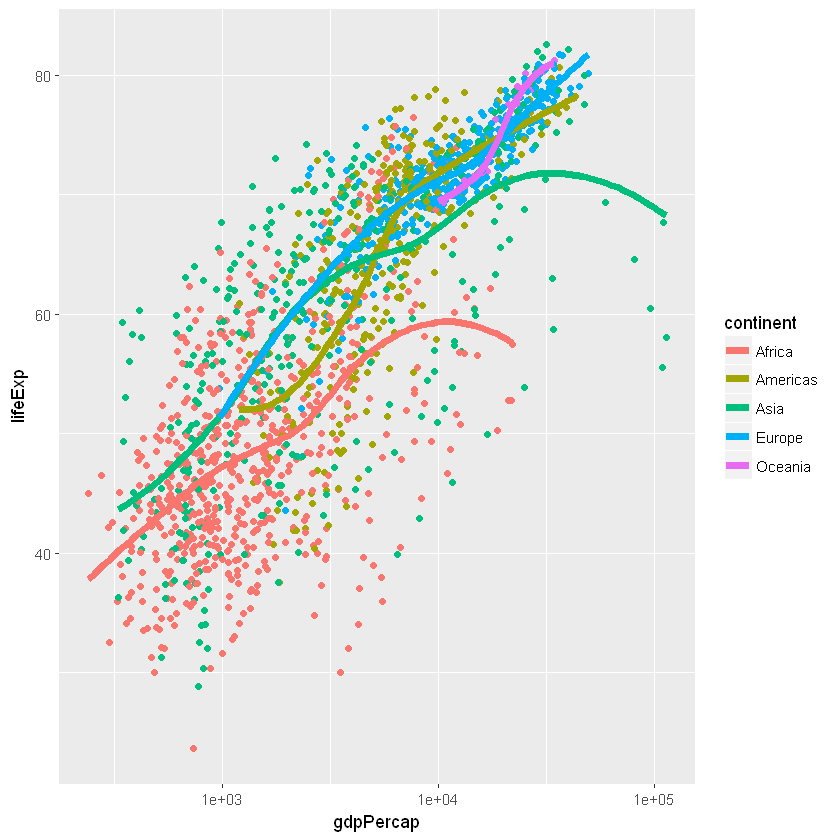

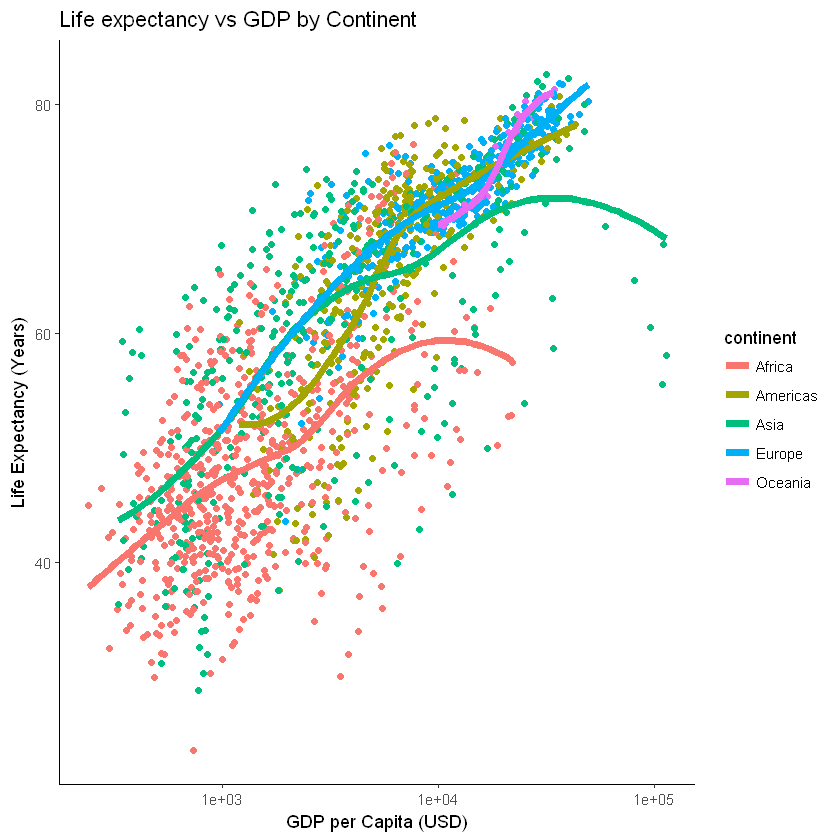

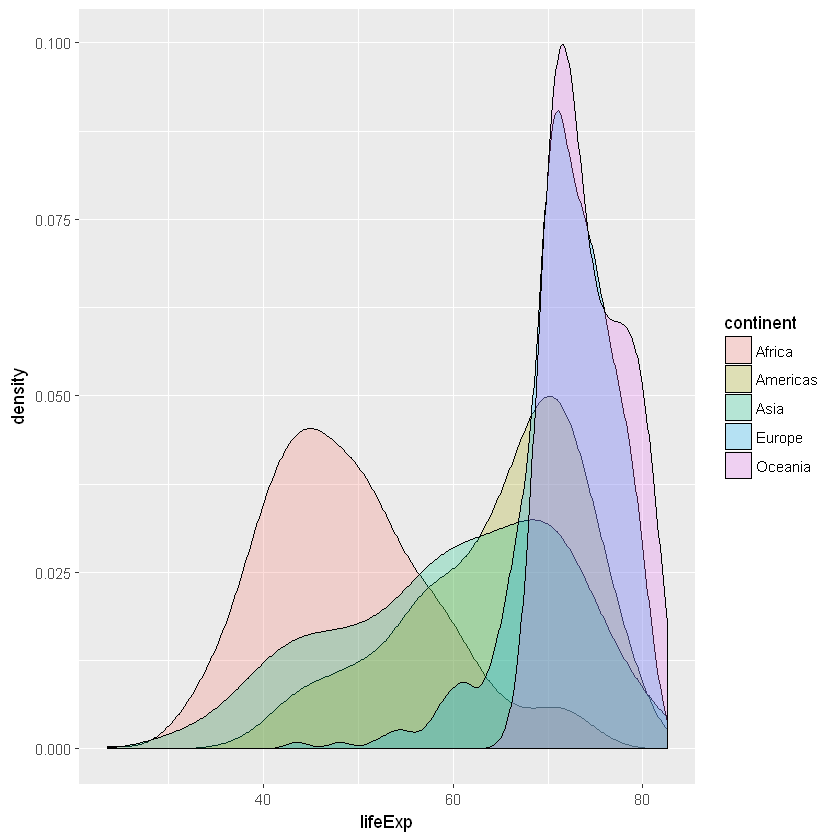

In [39]:
gapminder <- read.csv("http://kbroman.org/datacarp/gapminder.csv")
ggplot(gapminder, aes(x=gdpPercap, y=lifeExp)) + geom_point()

p<-ggplot(gapminder, aes(x=gdpPercap, y=lifeExp)) + geom_point()
p1<-p+scale_x_log10()
p1+geom_smooth()
p1 + aes(color = continent) + geom_point() + geom_smooth(se=F, lwd=2)
p1 + aes(color = continent) + geom_point() + geom_smooth(se=F, lwd=2)+theme_classic()+ggtitle("Life expectancy vs GDP by Continent")+xlab("GDP per Capita (USD)")+ylab("Life Expectancy (Years)")
p2 <- ggplot(gapminder, aes(lifeExp))
p2 + geom_density(aes(fill=continent), alpha=1/4)


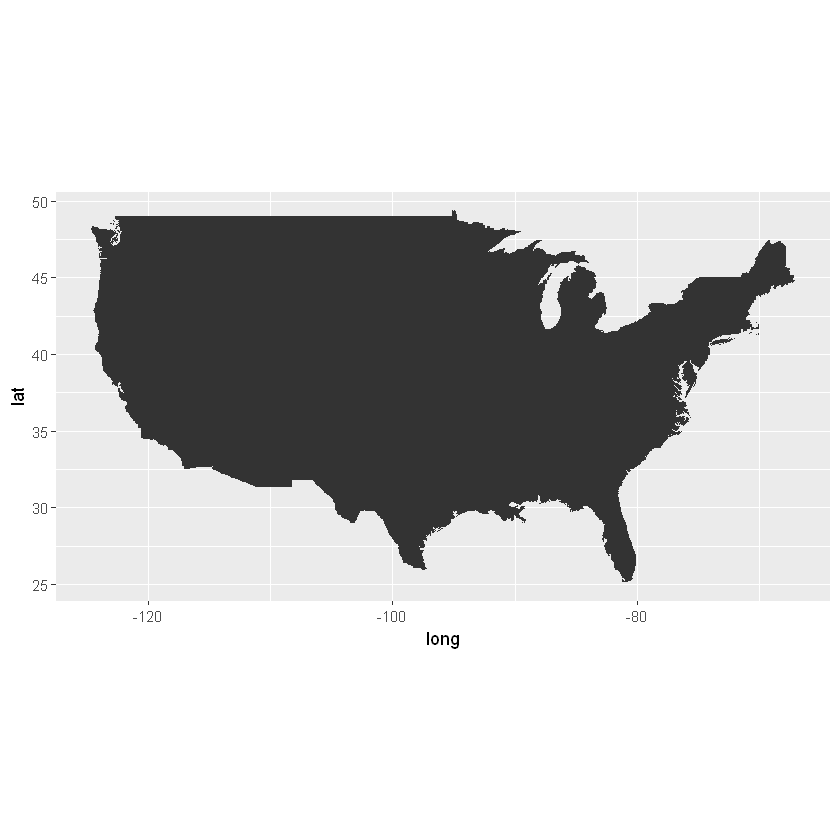

In [40]:
usa <- map_data("usa") 
ggplot() + geom_polygon(data = usa, aes(x = long, y = lat, group = group)) + 
coord_quickmap()


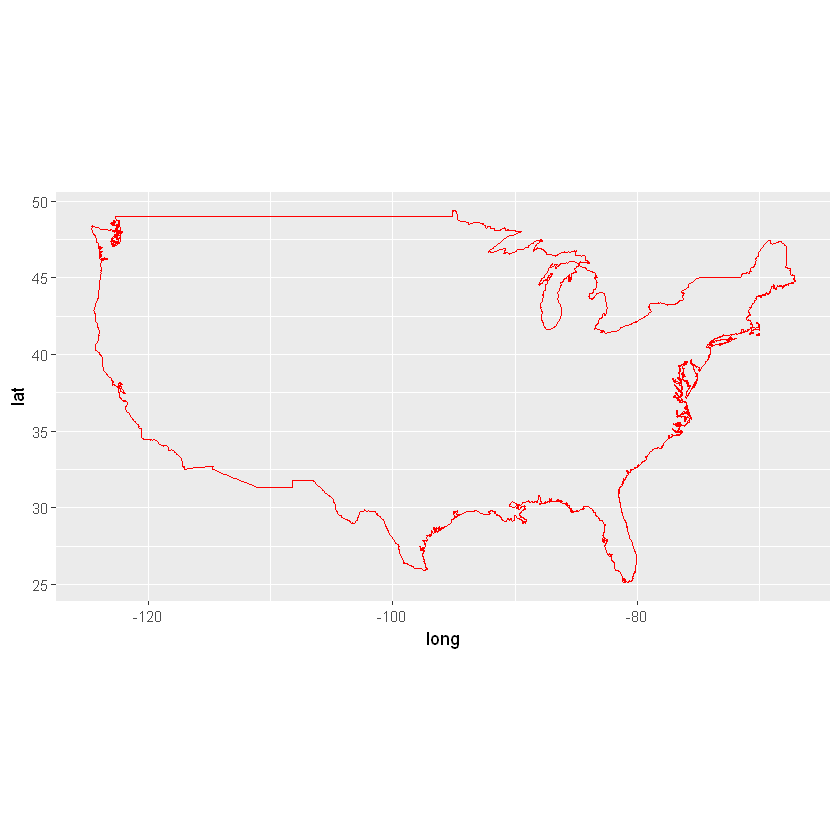

In [41]:
ggplot() + 
  geom_polygon(data = usa, aes(x = long, y = lat, group = group), fill = NA, color = "red") + 
  coord_quickmap()

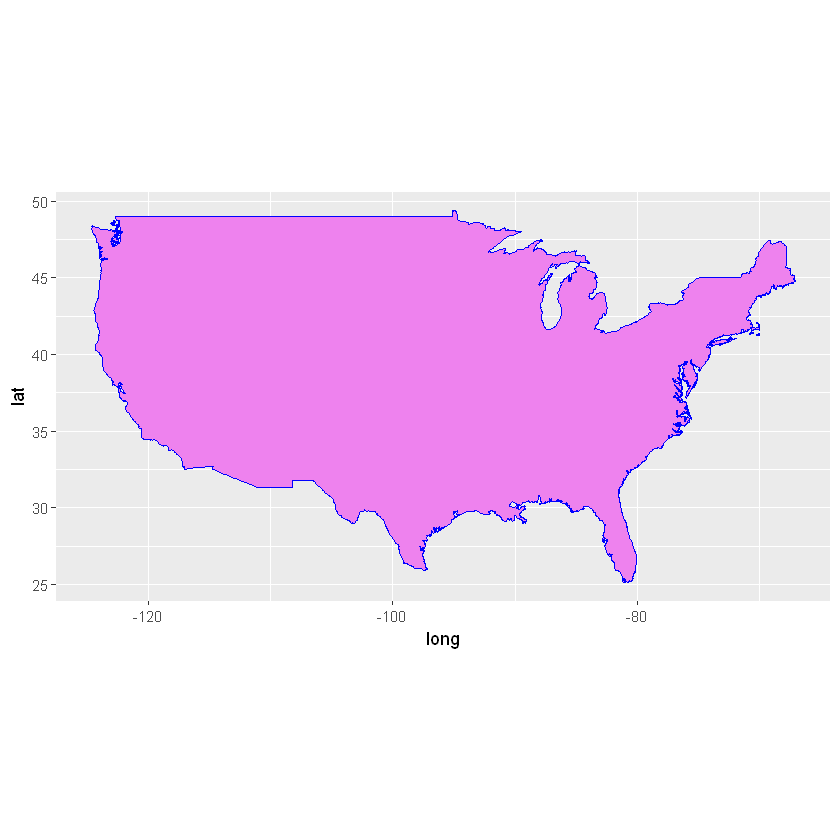

In [42]:
gg1 <- ggplot() + 
  geom_polygon(data = usa, aes(x = long, y = lat, group = group), fill = "violet", color = "blue") + 
  coord_quickmap()
gg1

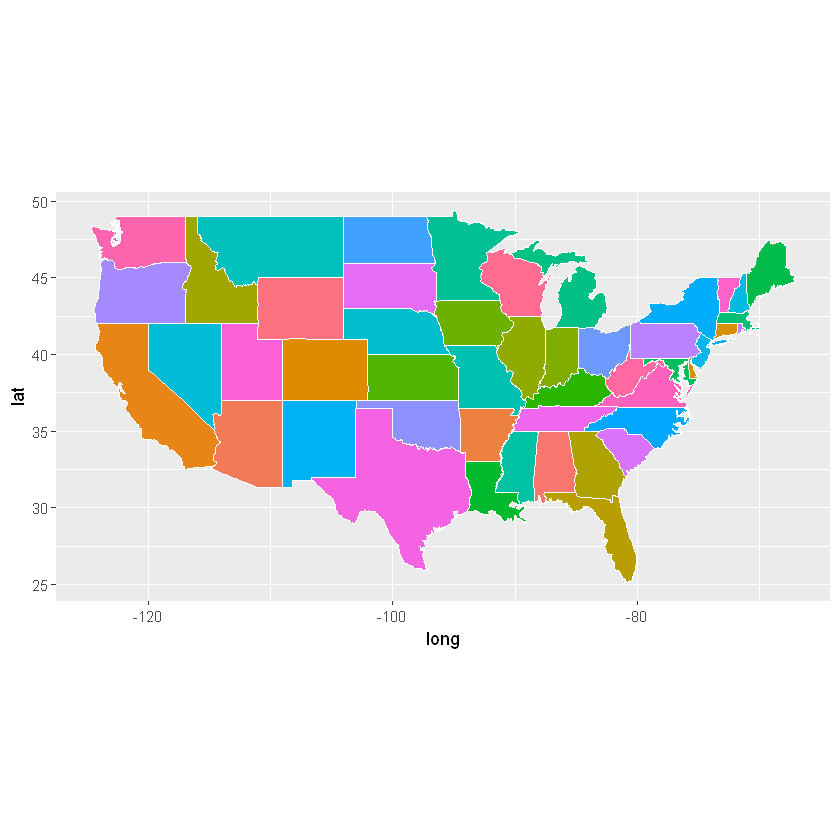

In [44]:
states <- map_data("state")
ggplot(data = states) + 
  geom_polygon(aes(x = long, y = lat, fill = region, group = group), color = "white") + 
  coord_quickmap() +
  guides(fill = FALSE)  # do this to leave off the color legend

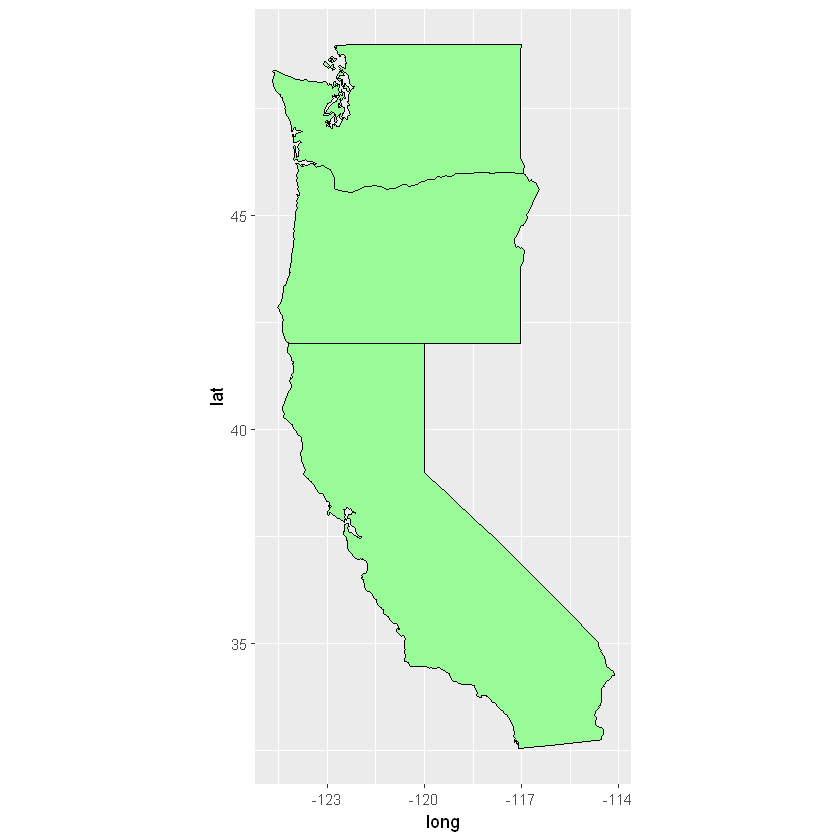

In [45]:
west_coast <- states %>%
  filter(region %in% c("california", "oregon", "washington"))
ggplot(data = west_coast) + 
  geom_polygon(aes(x = long, y = lat, group = group), fill = "palegreen", color = "black") + 
  coord_quickmap()

In [47]:
emp <- read.table("https://training-course-material.com/images/9/97/Emp.txt",header=TRUE)
head(emp)

ID,ENAME,JOB,MGR,HIREDATE,SAL,COMM,DEPTNO
7839,BUSH,PRESIDENT,NA,17/11/1981,5000,NA,10
7698,BLAIR,MANAGER,7839,01/05/1981,2850,NA,30
7782,MERKEL,MANAGER,7839,09/06/1981,2450,NA,10
7566,PUTIN,MANAGER,7839,02/04/1981,2975,NA,20
7654,CHIRACK,SALESMAN,7698,28/09/1981,1250,1400,30
7499,BAROSSO,SALESMAN,7698,20/02/1981,1600,300,30


In [48]:
str(emp)

'data.frame':	14 obs. of  8 variables:
 $ ID      : int  7839 7698 7782 7566 7654 7499 7844 7900 7521 7902 ...
 $ ENAME   : Factor w/ 14 levels "BAROSSO","BLAIR",..: 4 2 10 11 6 1 9 3 14 13 ...
 $ JOB     : Factor w/ 5 levels "ANALYST","CLERK",..: 4 3 3 3 5 5 5 2 5 1 ...
 $ MGR     : int  NA 7839 7839 7839 7698 7698 7698 7698 7698 7566 ...
 $ HIREDATE: Factor w/ 13 levels "01/05/1981","02/04/1981",..: 8 1 5 2 13 10 4 3 11 3 ...
 $ SAL     : int  5000 2850 2450 2975 1250 1600 1500 950 1250 3000 ...
 $ COMM    : int  NA NA NA NA 1400 300 0 NA 500 NA ...
 $ DEPTNO  : int  10 30 10 20 30 30 30 30 30 20 ...


a.	How many variables are of the type factor?
<br>b.	Rename the columns
<br>c.	Select the employees with salary (SAL)>2000.
<br>d.	Sort by the salary in ascending order.
<br>e.	Sort by the salary in descending order.
<br>f.	Select people hired before or on first of April 1981.
<br>g.	Select only managers.
<br>h.	Select all except clerks.



a.	Use str(emp) to get variable types, 3 variables are of type Factor.
<br>b.	names(emp) <- c("new_name", "another_new_name")
<br>c.	emp[SAL>2000,]
<br>d.	emp[order(SAL),]
<br>e.	emp[order(SAL,decreasing=TRUE),]
<br>f.	emp[HIREDATE <= '1981-04-01',]
<br>g.	emp[JOB == "MANAGER",]
<br>h.	emp[JOB != 'CLERK',]
